In [19]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('data/train.csv', )
print(df.head())

   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                

In [16]:
df = df.drop(df.columns[0], axis=1)

In [18]:
survey_columns = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

survey_data = df[survey_columns]
survey_data.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3


C:\Users\ssson\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


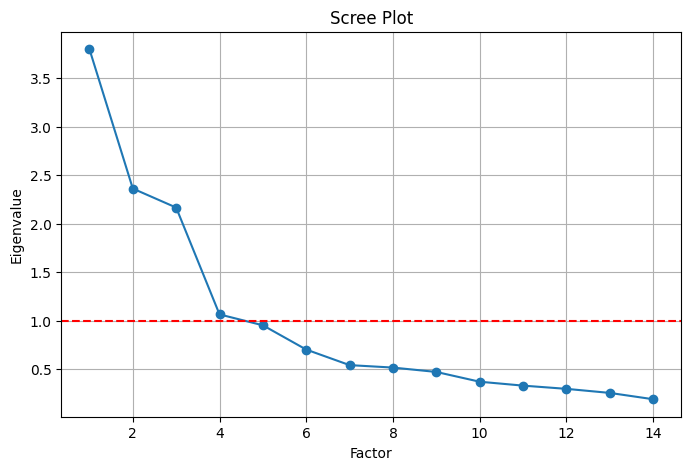

In [20]:
fa = FactorAnalyzer(rotation=None)
fa.fit(survey_data)

ev, _ = fa.get_eigenvalues()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(ev) + 1), ev, marker='o')
plt.axhline(y=1, color='r', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [22]:
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(survey_data)

loadings = pd.DataFrame(fa.loadings_, index=survey_columns)
print(loadings)

                                          0         1         2
Inflight wifi service              0.168270  0.128271  0.758091
Departure/Arrival time convenient -0.029508  0.059681  0.501384
Ease of Online booking             0.030231  0.020914  0.932775
Gate location                     -0.033828 -0.032311  0.504044
Food and drink                     0.752639  0.010946  0.006167
Online boarding                    0.395453  0.113811  0.359065
Seat comfort                       0.789990  0.081463  0.027258
Inflight entertainment             0.745693  0.466750  0.012034
On-board service                   0.093881  0.701154  0.029009
Leg room service                   0.074455  0.481442  0.080650
Baggage handling                   0.023463  0.764748  0.027693
Checkin service                    0.143512  0.284182  0.028882
Inflight service                   0.018131  0.799771  0.018252
Cleanliness                        0.858420  0.088148 -0.001708


C:\Users\ssson\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Factor 0:
Food and drink, Seat comfort, Inflight entertainment, Inflight service - represents in-flight comfort and quality.
## Factor 1:
On-board service, Baggage handling, Inflight service — relates to service efficiency and logistics.
## Factor 2:
Inflight wifi service, Ease of Online booking, Departure/Arrival time convenient, Gate location — covers digital services and travel convenience.
## Could be used for:
		Improve in-flight comfort and service quality to boost satisfaction.
		Enhance baggage and on-board service efficiency.
		Focus on better digital tools and convenient processes.